In [1]:
import cv2, numpy as np
from skimage import filters, feature, morphology, measure, segmentation, exposure
from scipy import ndimage as ndi
import matplotlib.pyplot as plt


<function matplotlib.pyplot.show(close=None, block=None)>

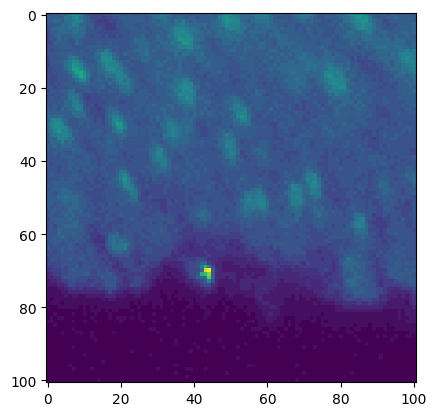

In [2]:
img = cv2.imread('indiv_slices/10-10001.tif', cv2.IMREAD_GRAYSCALE)
plt.imshow(img)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

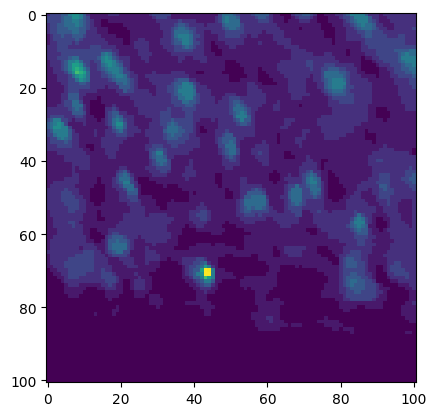

In [3]:
# 1. Background & contrast
bg = cv2.morphologyEx(img, cv2.MORPH_TOPHAT,
                      cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(31,31)))
img_eq = exposure.equalize_adapthist(bg, clip_limit=0.01)
img_eq = filters.median(img_eq)
plt.imshow(img_eq)
plt.show

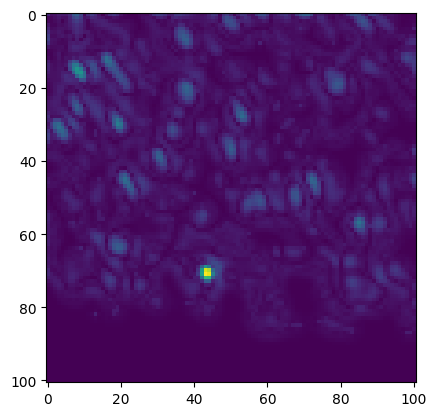

In [4]:
# 2a. Multi-scale LoG
sigmas   = np.arange(0.5, 1.5, 0.1)
log_resp = np.zeros_like(img_eq)
for s in sigmas:
    log_resp = np.maximum(log_resp,
                          s**2 * np.abs(filters.laplace(filters.gaussian(img_eq, s))))
    
plt.imshow(log_resp)
plt.show()

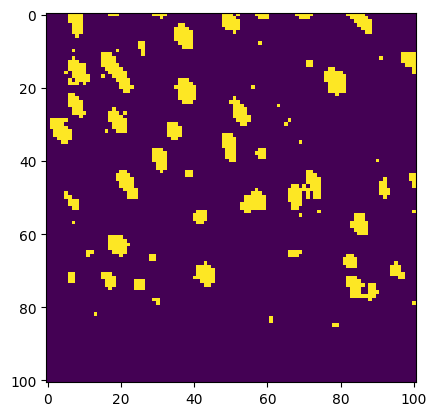

In [5]:
combo = log_resp > np.percentile(log_resp, 85)

th      = filters.threshold_sauvola(img_eq, window_size=11, k=0.12)
mask_in = np.logical_and(combo, img_eq > th)

plt.imshow(mask_in)
plt.show()

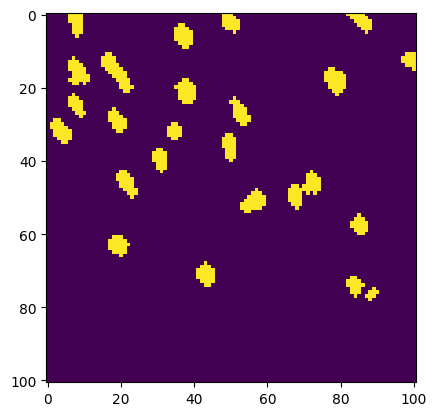

In [6]:
mask = morphology.remove_small_objects(mask_in, 15)       # area in px²
mask = morphology.remove_small_holes(mask, 20)
mask = morphology.binary_opening(mask, morphology.disk(1))


plt.imshow(mask)
plt.show()